# Practical 1: Power Balancing for a Local Community

#### Importing the needed packages
The first step in every python notebook is to install the needed packages (e.g. [`pandas`](https://pandas.pydata.org/docs/user_guide/index.html) for data management) as well as functions and classes from external scripts. For this practical assignment the class simulation_creator_Balancing is used to simplify the set-up of simulations of different energy systems.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import functions_T1

#Importing the Simulation script
import sys
import os
current_dir = os.getcwd()
parent_dir = os.path.abspath(os.path.join(current_dir, os.pardir))
sys.path.insert(0, parent_dir)
from simulation_creator_T1_Balancing import simulation_creator_Balancing

A neighbourhood is connected to the grid as sketched below. For a typical day in the year the neighbourhood has a given demand profile. The given load data is for a year and is given in 15 minute intervals. To cover this demand electricity is taken from the grid.

**Task 1**: The first task entails the analysis of the load profile of the neighbourhood for a day of choice. The following python code plots a typical day based on the given load data and the specified number of houses in the neighbourhood. In the code the load data is first saved in a pandas dataframe and it is ensured that the index is the time. Then the day is chosen and a function is called to plot the load data on this day. Run the code and describe what you can see in the plot. You can vary the day for which you want to plot the load with the day_of_year parameter. 

![T1_basecase](Graphics_T1/T1_basecase.png)

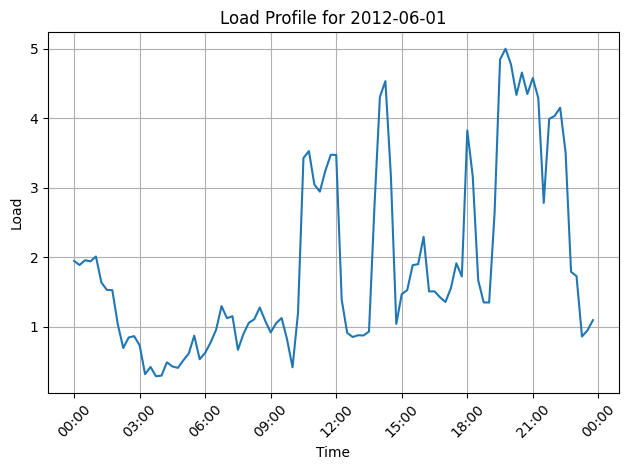

In [5]:
load_df = pd.read_csv('../Scenarios/load_data.txt', delimiter=',', skiprows=1)
load_df['time'] = pd.to_datetime(load_df['time'])
load_df.set_index('time', inplace=True)

#choose which day of the year to plot
day_of_year = "2012-06-01"
number_houses = 5 
plot_load_base_case = functions_T1.plot_load_profile(load_df, day_of_year, number_houses)

The community implements small scale PV and wind power plants to become more autonomous. Now first the supply from the local renewable energy sources is used to cover the demand in the community. The residual load is then supplied by the grid. In case of excess renewable generation the generated electricity is fed into the grid.

![T1_RES_case](Graphics_T1/T1_RES_case.png)

**Task 2**: In the below presented code the neighbourhood is set up by defining the key components (here Wind, PV and Load). After defining number of houses and specifications of the installed wind and solar energy in the neighbourhood, a simulation is created and started with the simulation_creator_Balancing class. Finally, the summarise_results function

Run the following python code and look at the resulting residual load plot. Describe the plot and compare it to the results from task 1. Vary the installed PV and Wind power as well as the number of houses in the neighbourhood. Describe your findings.

2024-08-27 09:43:02.960 | INFO     | mosaik.scenario:start:255 - Starting "Controller" as "Controller-0" ...
2024-08-27 09:43:02.973 | INFO     | mosaik.scenario:start:255 - Starting "Collector" as "Collector-0" ...
2024-08-27 09:43:02.997 | INFO     | mosaik.scenario:start:255 - Starting "CSVB" as "CSVB-0" ...


Collector create: hi
Collector create: bye


2024-08-27 09:43:03.981 | INFO     | mosaik.scenario:start:255 - Starting "Wind" as "Wind-0" ...
2024-08-27 09:43:04.004 | WARNING  | mosaik.scenario:_check_attributes_values:730 - A connection between persistent and trigger attributes is not recommended.This might cause problems in the simulation!
2024-08-27 09:43:04.005 | INFO     | mosaik.scenario:start:255 - Starting "CSVB" as "CSVB-1" ...
2024-08-27 09:43:04.869 | INFO     | mosaik.scenario:start:255 - Starting "PV" as "PV-0" ...
2024-08-27 09:43:04.892 | WARNING  | mosaik.scenario:_check_attributes_values:730 - A connection between persistent and trigger attributes is not recommended.This might cause problems in the simulation!
2024-08-27 09:43:04.893 | WARNING  | mosaik.scenario:_check_attributes_values:730 - A connection between persistent and trigger attributes is not recommended.This might cause problems in the simulation!
2024-08-27 09:43:04.896 | WARNING  | mosaik.scenario:_check_attributes_values:730 - A connection between

from wind %%%%%%%%%% 2012-06-01 00:00:00
from pv %%%%%%%%% 2012-06-01 00:00:00
from load %%%%%%%%%%% 2012-06-01 00:00:00
from controller %%%%%%%%% 2012-06-01 00:00:00
#attrs:  {'wind_gen': {'Wind-0.wind_0': 35.76452525450019}, 'pv_gen': {'PV-0.pv_0': 0.0}, 'load_dem': {'Load-0.load_0': 0.48726106250000006}}
Load dem: 0.48726106250000006
pv: 0.0
wind: 35.76452525450019
residual load: -35.27726419200019
battery flow: 0
35.76452525450019 0.0 0.48726106250000006 50
from pv %%%%%%%%% 2012-06-01 00:15:00
from wind %%%%%%%%%% 2012-06-01 00:15:00
from load %%%%%%%%%%% 2012-06-01 00:15:00
from controller %%%%%%%%% 2012-06-01 00:15:00
#attrs:  {'pv_gen': {'PV-0.pv_0': 0.0}, 'wind_gen': {'Wind-0.wind_0': 30.101308509079523}, 'load_dem': {'Load-0.load_0': 0.4727848025}}
Load dem: 0.4727848025
pv: 0.0
wind: 30.101308509079523
residual load: -29.62852370657952
battery flow: 0
30.101308509079523 0.0 0.4727848025 50
from pv %%%%%%%%% 2012-06-01 00:30:00
from wind %%%%%%%%%% 2012-06-01 00:30:00
from lo

C:\Users\jana9\Illuminator_Git\Illuminator\Models\collector.py:102: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = existing_df.append(df)
C:\Users\jana9\Illuminator_Git\Illuminator\Models\collector.py:102: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = existing_df.append(df)
C:\Users\jana9\Illuminator_Git\Illuminator\Models\collector.py:102: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = existing_df.append(df)
  7%|▋         | 5738/86400 [00:00<00:04, 18018.27steps/s]C:\Users\jana9\Illuminator_Git\Illuminator\Models\collector.py:102: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = exist

from pv %%%%%%%%% 2012-06-01 01:15:00
from wind %%%%%%%%%% 2012-06-01 01:15:00
from load %%%%%%%%%%% 2012-06-01 01:15:00
from controller %%%%%%%%% 2012-06-01 01:15:00
#attrs:  {'pv_gen': {'PV-0.pv_0': 0.0}, 'wind_gen': {'Wind-0.wind_0': 22.861674995762083}, 'load_dem': {'Load-0.load_0': 0.40983445374999994}}
Load dem: 0.40983445374999994
pv: 0.0
wind: 22.861674995762083
residual load: -22.451840542012082
battery flow: 0
22.861674995762083 0.0 0.40983445374999994 50
from pv %%%%%%%%% 2012-06-01 01:30:00
from wind %%%%%%%%%% 2012-06-01 01:30:00
from load %%%%%%%%%%% 2012-06-01 01:30:00
from controller %%%%%%%%% 2012-06-01 01:30:00
#attrs:  {'pv_gen': {'PV-0.pv_0': 0.0}, 'wind_gen': {'Wind-0.wind_0': 21.728249901040478}, 'load_dem': {'Load-0.load_0': 0.38339174000000004}}
Load dem: 0.38339174000000004
pv: 0.0
wind: 21.728249901040478
residual load: -21.344858161040477
battery flow: 0
21.728249901040478 0.0 0.38339174000000004 50
from pv %%%%%%%%% 2012-06-01 01:45:00
from wind %%%%%%%%%% 2

C:\Users\jana9\Illuminator_Git\Illuminator\Models\collector.py:102: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = existing_df.append(df)
C:\Users\jana9\Illuminator_Git\Illuminator\Models\collector.py:102: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = existing_df.append(df)
 11%|█▏        | 9788/86400 [00:00<00:04, 18730.07steps/s]C:\Users\jana9\Illuminator_Git\Illuminator\Models\collector.py:102: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = existing_df.append(df)
C:\Users\jana9\Illuminator_Git\Illuminator\Models\collector.py:102: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = exist

from controller %%%%%%%%% 2012-06-01 02:30:00
#attrs:  {'pv_gen': {'PV-0.pv_0': 0.0}, 'wind_gen': {'Wind-0.wind_0': 27.695674065146253}, 'load_dem': {'Load-0.load_0': 0.21222634875000002}}
Load dem: 0.21222634875000002
pv: 0.0
wind: 27.695674065146253
residual load: -27.483447716396253
battery flow: 0
27.695674065146253 0.0 0.21222634875000002 50
from pv %%%%%%%%% 2012-06-01 02:45:00
from wind %%%%%%%%%% 2012-06-01 02:45:00
from load %%%%%%%%%%% 2012-06-01 02:45:00
from controller %%%%%%%%% 2012-06-01 02:45:00
#attrs:  {'pv_gen': {'PV-0.pv_0': 0.0}, 'wind_gen': {'Wind-0.wind_0': 21.64875638280169}, 'load_dem': {'Load-0.load_0': 0.21717543374999998}}
Load dem: 0.21717543374999998
pv: 0.0
wind: 21.64875638280169
residual load: -21.43158094905169
battery flow: 0
21.64875638280169 0.0 0.21717543374999998 50
from pv %%%%%%%%% 2012-06-01 03:00:00
from wind %%%%%%%%%% 2012-06-01 03:00:00
from load %%%%%%%%%%% 2012-06-01 03:00:00
from controller %%%%%%%%% 2012-06-01 03:00:00
#attrs:  {'pv_gen'

C:\Users\jana9\Illuminator_Git\Illuminator\Models\collector.py:102: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = existing_df.append(df)
C:\Users\jana9\Illuminator_Git\Illuminator\Models\collector.py:102: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = existing_df.append(df)
 16%|█▌        | 13951/86400 [00:00<00:03, 19013.11steps/s]C:\Users\jana9\Illuminator_Git\Illuminator\Models\collector.py:102: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = existing_df.append(df)
C:\Users\jana9\Illuminator_Git\Illuminator\Models\collector.py:102: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = exis

from controller %%%%%%%%% 2012-06-01 03:45:00
#attrs:  {'pv_gen': {'PV-0.pv_0': 0.0}, 'wind_gen': {'Wind-0.wind_0': 23.27582579700007}, 'load_dem': {'Load-0.load_0': 0.07300557125}}
Load dem: 0.07300557125
pv: 0.0
wind: 23.27582579700007
residual load: -23.20282022575007
battery flow: 0
23.27582579700007 0.0 0.07300557125 50
from pv %%%%%%%%% 2012-06-01 04:00:00
from wind %%%%%%%%%% 2012-06-01 04:00:00
from load %%%%%%%%%%% 2012-06-01 04:00:00
from controller %%%%%%%%% 2012-06-01 04:00:00
#attrs:  {'pv_gen': {'PV-0.pv_0': 0.0}, 'wind_gen': {'Wind-0.wind_0': 15.260444374942015}, 'load_dem': {'Load-0.load_0': 0.0752864375}}
Load dem: 0.0752864375
pv: 0.0
wind: 15.260444374942015
residual load: -15.185157937442014
battery flow: 0
15.260444374942015 0.0 0.0752864375 50
from pv %%%%%%%%% 2012-06-01 04:15:00
from wind %%%%%%%%%% 2012-06-01 04:15:00
from load %%%%%%%%%%% 2012-06-01 04:15:00
from controller %%%%%%%%% 2012-06-01 04:15:00
#attrs:  {'pv_gen': {'PV-0.pv_0': 0.0}, 'wind_gen': {'Win

C:\Users\jana9\Illuminator_Git\Illuminator\Models\collector.py:102: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = existing_df.append(df)
C:\Users\jana9\Illuminator_Git\Illuminator\Models\collector.py:102: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = existing_df.append(df)
 22%|██▏       | 18676/86400 [00:00<00:03, 20452.55steps/s]C:\Users\jana9\Illuminator_Git\Illuminator\Models\collector.py:102: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = existing_df.append(df)
C:\Users\jana9\Illuminator_Git\Illuminator\Models\collector.py:102: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = exis

from controller %%%%%%%%% 2012-06-01 05:00:00
#attrs:  {'pv_gen': {'PV-0.pv_0': 0.0}, 'wind_gen': {'Wind-0.wind_0': 9.842943191700193}, 'load_dem': {'Load-0.load_0': 0.13021821625000002}}
Load dem: 0.13021821625000002
pv: 0.0
wind: 9.842943191700193
residual load: -9.712724975450193
battery flow: 0
9.842943191700193 0.0 0.13021821625000002 50
from pv %%%%%%%%% 2012-06-01 05:15:00
from wind %%%%%%%%%% 2012-06-01 05:15:00
from load %%%%%%%%%%% 2012-06-01 05:15:00
from controller %%%%%%%%% 2012-06-01 05:15:00
#attrs:  {'pv_gen': {'PV-0.pv_0': 17.701372389566405}, 'wind_gen': {'Wind-0.wind_0': 11.526929247793102}, 'load_dem': {'Load-0.load_0': 0.154812705}}
Load dem: 0.154812705
pv: 17.701372389566405
wind: 11.526929247793102
residual load: -29.07348893235951
battery flow: 0
11.526929247793102 17.701372389566405 0.154812705 50
from pv %%%%%%%%% 2012-06-01 05:30:00
from wind %%%%%%%%%% 2012-06-01 05:30:00
from load %%%%%%%%%%% 2012-06-01 05:30:00
from controller %%%%%%%%% 2012-06-01 05:30:0

C:\Users\jana9\Illuminator_Git\Illuminator\Models\collector.py:102: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = existing_df.append(df)
C:\Users\jana9\Illuminator_Git\Illuminator\Models\collector.py:102: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = existing_df.append(df)
 29%|██▉       | 25313/86400 [00:01<00:03, 19800.26steps/s]C:\Users\jana9\Illuminator_Git\Illuminator\Models\collector.py:102: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = existing_df.append(df)
C:\Users\jana9\Illuminator_Git\Illuminator\Models\collector.py:102: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = exis

from controller %%%%%%%%% 2012-06-01 06:15:00
#attrs:  {'pv_gen': {'PV-0.pv_0': 33.3835124700914}, 'wind_gen': {'Wind-0.wind_0': 17.707503965089543}, 'load_dem': {'Load-0.load_0': 0.1944144175}}
Load dem: 0.1944144175
pv: 33.3835124700914
wind: 17.707503965089543
residual load: -50.89660201768094
battery flow: 0
17.707503965089543 33.3835124700914 0.1944144175 50
from pv %%%%%%%%% 2012-06-01 06:30:00
from wind %%%%%%%%%% 2012-06-01 06:30:00
from load %%%%%%%%%%% 2012-06-01 06:30:00
from controller %%%%%%%%% 2012-06-01 06:30:00
#attrs:  {'pv_gen': {'PV-0.pv_0': 342.8453139927262}, 'wind_gen': {'Wind-0.wind_0': 21.41143961844171}, 'load_dem': {'Load-0.load_0': 0.23959497249999998}}
Load dem: 0.23959497249999998
pv: 342.8453139927262
wind: 21.41143961844171
residual load: -364.01715863866787
battery flow: 0
21.41143961844171 342.8453139927262 0.23959497249999998 50
from pv %%%%%%%%% 2012-06-01 06:45:00
from wind %%%%%%%%%% 2012-06-01 06:45:00
from load %%%%%%%%%%% 2012-06-01 06:45:00
from

C:\Users\jana9\Illuminator_Git\Illuminator\Models\collector.py:102: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = existing_df.append(df)
C:\Users\jana9\Illuminator_Git\Illuminator\Models\collector.py:102: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = existing_df.append(df)
 34%|███▍      | 29251/86400 [00:01<00:03, 18945.79steps/s]C:\Users\jana9\Illuminator_Git\Illuminator\Models\collector.py:102: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = existing_df.append(df)
C:\Users\jana9\Illuminator_Git\Illuminator\Models\collector.py:102: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = exis

from controller %%%%%%%%% 2012-06-01 07:30:00
#attrs:  {'pv_gen': {'PV-0.pv_0': 88.03271624025432}, 'wind_gen': {'Wind-0.wind_0': 6.725155590333484}, 'load_dem': {'Load-0.load_0': 0.16794858}}
Load dem: 0.16794858
pv: 88.03271624025432
wind: 6.725155590333484
residual load: -94.5899232505878
battery flow: 0
6.725155590333484 88.03271624025432 0.16794858 50
from pv %%%%%%%%% 2012-06-01 07:45:00
from wind %%%%%%%%%% 2012-06-01 07:45:00
from load %%%%%%%%%%% 2012-06-01 07:45:00
from controller %%%%%%%%% 2012-06-01 07:45:00
#attrs:  {'pv_gen': {'PV-0.pv_0': 297.22984936328197}, 'wind_gen': {'Wind-0.wind_0': 4.884960659625227}, 'load_dem': {'Load-0.load_0': 0.22453109875}}
Load dem: 0.22453109875
pv: 297.22984936328197
wind: 4.884960659625227
residual load: -301.8902789241572
battery flow: 0
4.884960659625227 297.22984936328197 0.22453109875 50
from pv %%%%%%%%% 2012-06-01 08:00:00
from wind %%%%%%%%%% 2012-06-01 08:00:00
from load %%%%%%%%%%% 2012-06-01 08:00:00
from controller %%%%%%%%% 2

C:\Users\jana9\Illuminator_Git\Illuminator\Models\collector.py:102: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = existing_df.append(df)
C:\Users\jana9\Illuminator_Git\Illuminator\Models\collector.py:102: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = existing_df.append(df)
 39%|███▊      | 33413/86400 [00:01<00:02, 19085.96steps/s]C:\Users\jana9\Illuminator_Git\Illuminator\Models\collector.py:102: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = existing_df.append(df)
C:\Users\jana9\Illuminator_Git\Illuminator\Models\collector.py:102: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = exis

from pv %%%%%%%%% 2012-06-01 09:00:00
from wind %%%%%%%%%% 2012-06-01 09:00:00
from load %%%%%%%%%%% 2012-06-01 09:00:00
from controller %%%%%%%%% 2012-06-01 09:00:00
#attrs:  {'pv_gen': {'PV-0.pv_0': 135.52077638405348}, 'wind_gen': {'Wind-0.wind_0': 6.40269109177492}, 'load_dem': {'Load-0.load_0': 0.23065882}}
Load dem: 0.23065882
pv: 135.52077638405348
wind: 6.40269109177492
residual load: -141.6928086558284
battery flow: 0
6.40269109177492 135.52077638405348 0.23065882 50
from pv %%%%%%%%% 2012-06-01 09:15:00
from wind %%%%%%%%%% 2012-06-01 09:15:00
from load %%%%%%%%%%% 2012-06-01 09:15:00
from controller %%%%%%%%% 2012-06-01 09:15:00
#attrs:  {'pv_gen': {'PV-0.pv_0': 483.36389810224654}, 'wind_gen': {'Wind-0.wind_0': 9.380910430615765}, 'load_dem': {'Load-0.load_0': 0.26358854}}
Load dem: 0.26358854
pv: 483.36389810224654
wind: 9.380910430615765
residual load: -492.4812199928623
battery flow: 0
9.380910430615765 483.36389810224654 0.26358854 50
from pv %%%%%%%%% 2012-06-01 09:30:

C:\Users\jana9\Illuminator_Git\Illuminator\Models\collector.py:102: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = existing_df.append(df)
C:\Users\jana9\Illuminator_Git\Illuminator\Models\collector.py:102: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = existing_df.append(df)
 43%|████▎     | 37351/86400 [00:01<00:02, 17601.59steps/s]C:\Users\jana9\Illuminator_Git\Illuminator\Models\collector.py:102: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = existing_df.append(df)
C:\Users\jana9\Illuminator_Git\Illuminator\Models\collector.py:102: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = exis

from pv %%%%%%%%% 2012-06-01 10:00:00
from wind %%%%%%%%%% 2012-06-01 10:00:00
from load %%%%%%%%%%% 2012-06-01 10:00:00
from controller %%%%%%%%% 2012-06-01 10:00:00
#attrs:  {'pv_gen': {'PV-0.pv_0': 473.8899765233873}, 'wind_gen': {'Wind-0.wind_0': 16.288903442535922}, 'load_dem': {'Load-0.load_0': 0.105212065}}
Load dem: 0.105212065
pv: 473.8899765233873
wind: 16.288903442535922
residual load: -490.0736679009232
battery flow: 0
16.288903442535922 473.8899765233873 0.105212065 50
from pv %%%%%%%%% 2012-06-01 10:15:00
from wind %%%%%%%%%% 2012-06-01 10:15:00
from load %%%%%%%%%%% 2012-06-01 10:15:00
from controller %%%%%%%%% 2012-06-01 10:15:00
#attrs:  {'pv_gen': {'PV-0.pv_0': 162.57075852589827}, 'wind_gen': {'Wind-0.wind_0': 12.164222650555097}, 'load_dem': {'Load-0.load_0': 0.30001804}}
Load dem: 0.30001804
pv: 162.57075852589827
wind: 12.164222650555097
residual load: -174.43496313645338
battery flow: 0
12.164222650555097 162.57075852589827 0.30001804 50
from pv %%%%%%%%% 2012-06

C:\Users\jana9\Illuminator_Git\Illuminator\Models\collector.py:102: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = existing_df.append(df)
C:\Users\jana9\Illuminator_Git\Illuminator\Models\collector.py:102: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = existing_df.append(df)
 48%|████▊     | 41851/86400 [00:02<00:02, 17929.92steps/s]C:\Users\jana9\Illuminator_Git\Illuminator\Models\collector.py:102: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = existing_df.append(df)
C:\Users\jana9\Illuminator_Git\Illuminator\Models\collector.py:102: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = exis

from pv %%%%%%%%% 2012-06-01 11:15:00
from wind %%%%%%%%%% 2012-06-01 11:15:00
from load %%%%%%%%%%% 2012-06-01 11:15:00
from controller %%%%%%%%% 2012-06-01 11:15:00
#attrs:  {'pv_gen': {'PV-0.pv_0': 130.3877079411406}, 'wind_gen': {'Wind-0.wind_0': 23.863996085028973}, 'load_dem': {'Load-0.load_0': 0.7365055462500001}}
Load dem: 0.7365055462500001
pv: 130.3877079411406
wind: 23.863996085028973
residual load: -153.51519847991958
battery flow: 0
23.863996085028973 130.3877079411406 0.7365055462500001 50
from pv %%%%%%%%% 2012-06-01 11:30:00
from wind %%%%%%%%%% 2012-06-01 11:30:00
from load %%%%%%%%%%% 2012-06-01 11:30:00
from controller %%%%%%%%% 2012-06-01 11:30:00
#attrs:  {'pv_gen': {'PV-0.pv_0': 160.61860915594409}, 'wind_gen': {'Wind-0.wind_0': 29.21987365128263}, 'load_dem': {'Load-0.load_0': 0.8110779487499999}}
Load dem: 0.8110779487499999
pv: 160.61860915594409
wind: 29.21987365128263
residual load: -189.0274048584767
battery flow: 0
29.21987365128263 160.61860915594409 0.811

C:\Users\jana9\Illuminator_Git\Illuminator\Models\collector.py:102: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = existing_df.append(df)
C:\Users\jana9\Illuminator_Git\Illuminator\Models\collector.py:102: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = existing_df.append(df)
C:\Users\jana9\Illuminator_Git\Illuminator\Models\collector.py:102: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = existing_df.append(df)
 54%|█████▎    | 46238/86400 [00:02<00:02, 18553.35steps/s]C:\Users\jana9\Illuminator_Git\Illuminator\Models\collector.py:102: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = exis

from controller %%%%%%%%% 2012-06-01 12:30:00
#attrs:  {'pv_gen': {'PV-0.pv_0': 191.32254094703302}, 'wind_gen': {'Wind-0.wind_0': 23.694948337219877}, 'load_dem': {'Load-0.load_0': 0.2291436875}}
Load dem: 0.2291436875
pv: 191.32254094703302
wind: 23.694948337219877
residual load: -214.7883455967529
battery flow: 0
23.694948337219877 191.32254094703302 0.2291436875 50
from pv %%%%%%%%% 2012-06-01 12:45:00
from wind %%%%%%%%%% 2012-06-01 12:45:00
from load %%%%%%%%%%% 2012-06-01 12:45:00
from controller %%%%%%%%% 2012-06-01 12:45:00
#attrs:  {'pv_gen': {'PV-0.pv_0': 264.1150014385639}, 'wind_gen': {'Wind-0.wind_0': 23.359251616667443}, 'load_dem': {'Load-0.load_0': 0.21402349125}}
Load dem: 0.21402349125
pv: 264.1150014385639
wind: 23.359251616667443
residual load: -287.26022956398134
battery flow: 0
23.359251616667443 264.1150014385639 0.21402349125 50
from pv %%%%%%%%% 2012-06-01 13:00:00
from wind %%%%%%%%%% 2012-06-01 13:00:00
from load %%%%%%%%%%% 2012-06-01 13:00:00
from controll

C:\Users\jana9\Illuminator_Git\Illuminator\Models\collector.py:102: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = existing_df.append(df)
C:\Users\jana9\Illuminator_Git\Illuminator\Models\collector.py:102: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = existing_df.append(df)
 58%|█████▊    | 50288/86400 [00:02<00:01, 18329.08steps/s]C:\Users\jana9\Illuminator_Git\Illuminator\Models\collector.py:102: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = existing_df.append(df)
C:\Users\jana9\Illuminator_Git\Illuminator\Models\collector.py:102: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = exis

from pv %%%%%%%%% 2012-06-01 13:45:00
from wind %%%%%%%%%% 2012-06-01 13:45:00
from load %%%%%%%%%%% 2012-06-01 13:45:00
from controller %%%%%%%%% 2012-06-01 13:45:00
#attrs:  {'pv_gen': {'PV-0.pv_0': 237.49044363102877}, 'wind_gen': {'Wind-0.wind_0': 25.510223860056925}, 'load_dem': {'Load-0.load_0': 0.683302705}}
Load dem: 0.683302705
pv: 237.49044363102877
wind: 25.510223860056925
residual load: -262.3173647860857
battery flow: 0
25.510223860056925 237.49044363102877 0.683302705 50
from pv %%%%%%%%% 2012-06-01 14:00:00
from wind %%%%%%%%%% 2012-06-01 14:00:00
from load %%%%%%%%%%% 2012-06-01 14:00:00
from controller %%%%%%%%% 2012-06-01 14:00:00
#attrs:  {'pv_gen': {'PV-0.pv_0': 234.76018479924969}, 'wind_gen': {'Wind-0.wind_0': 18.841962880920963}, 'load_dem': {'Load-0.load_0': 1.0772118962500001}}
Load dem: 1.0772118962500001
pv: 234.76018479924969
wind: 18.841962880920963
residual load: -252.52493578392065
battery flow: 0
18.841962880920963 234.76018479924969 1.0772118962500001 5

C:\Users\jana9\Illuminator_Git\Illuminator\Models\collector.py:102: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = existing_df.append(df)
 63%|██████▎   | 54338/86400 [00:02<00:01, 18060.19steps/s]C:\Users\jana9\Illuminator_Git\Illuminator\Models\collector.py:102: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = existing_df.append(df)
C:\Users\jana9\Illuminator_Git\Illuminator\Models\collector.py:102: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = existing_df.append(df)
 65%|██████▌   | 56251/86400 [00:03<00:01, 17389.76steps/s]

from controller %%%%%%%%% 2012-06-01 14:45:00
#attrs:  {'pv_gen': {'PV-0.pv_0': 280.5084605829591}, 'wind_gen': {'Wind-0.wind_0': 30.101308509079523}, 'load_dem': {'Load-0.load_0': 0.261037535}}
Load dem: 0.261037535
pv: 280.5084605829591
wind: 30.101308509079523
residual load: -310.34873155703866
battery flow: 0
30.101308509079523 280.5084605829591 0.261037535 50
from pv %%%%%%%%% 2012-06-01 15:00:00
from wind %%%%%%%%%% 2012-06-01 15:00:00
from load %%%%%%%%%%% 2012-06-01 15:00:00
from controller %%%%%%%%% 2012-06-01 15:00:00
#attrs:  {'pv_gen': {'PV-0.pv_0': 138.03980154781465}, 'wind_gen': {'Wind-0.wind_0': 33.48470301887081}, 'load_dem': {'Load-0.load_0': 0.3681733325}}
Load dem: 0.3681733325
pv: 138.03980154781465
wind: 33.48470301887081
residual load: -171.15633123418547
battery flow: 0
33.48470301887081 138.03980154781465 0.3681733325 50
from pv %%%%%%%%% 2012-06-01 15:15:00
from wind %%%%%%%%%% 2012-06-01 15:15:00
from load %%%%%%%%%%% 2012-06-01 15:15:00
from controller %%%%%

C:\Users\jana9\Illuminator_Git\Illuminator\Models\collector.py:102: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = existing_df.append(df)
C:\Users\jana9\Illuminator_Git\Illuminator\Models\collector.py:102: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = existing_df.append(df)
 67%|██████▋   | 58276/86400 [00:03<00:01, 18001.44steps/s]C:\Users\jana9\Illuminator_Git\Illuminator\Models\collector.py:102: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = existing_df.append(df)
C:\Users\jana9\Illuminator_Git\Illuminator\Models\collector.py:102: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = exis

from pv %%%%%%%%% 2012-06-01 15:45:00
from wind %%%%%%%%%% 2012-06-01 15:45:00
from load %%%%%%%%%%% 2012-06-01 15:45:00
from controller %%%%%%%%% 2012-06-01 15:45:00
#attrs:  {'pv_gen': {'PV-0.pv_0': 204.03957458300968}, 'wind_gen': {'Wind-0.wind_0': 28.546335875818997}, 'load_dem': {'Load-0.load_0': 0.47579471249999994}}
Load dem: 0.47579471249999994
pv: 204.03957458300968
wind: 28.546335875818997
residual load: -232.1101157463287
battery flow: 0
28.546335875818997 204.03957458300968 0.47579471249999994 50
from pv %%%%%%%%% 2012-06-01 16:00:00
from wind %%%%%%%%%% 2012-06-01 16:00:00
from load %%%%%%%%%%% 2012-06-01 16:00:00
from controller %%%%%%%%% 2012-06-01 16:00:00
#attrs:  {'pv_gen': {'PV-0.pv_0': 79.72869815713369}, 'wind_gen': {'Wind-0.wind_0': 18.411032717710054}, 'load_dem': {'Load-0.load_0': 0.57409098375}}
Load dem: 0.57409098375
pv: 79.72869815713369
wind: 18.411032717710054
residual load: -97.56563989109375
battery flow: 0
18.411032717710054 79.72869815713369 0.57409098

C:\Users\jana9\Illuminator_Git\Illuminator\Models\collector.py:102: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = existing_df.append(df)
C:\Users\jana9\Illuminator_Git\Illuminator\Models\collector.py:102: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = existing_df.append(df)
 72%|███████▏  | 62438/86400 [00:03<00:01, 18122.72steps/s]C:\Users\jana9\Illuminator_Git\Illuminator\Models\collector.py:102: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = existing_df.append(df)
C:\Users\jana9\Illuminator_Git\Illuminator\Models\collector.py:102: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = exis

from pv %%%%%%%%% 2012-06-01 17:00:00
from wind %%%%%%%%%% 2012-06-01 17:00:00
from load %%%%%%%%%%% 2012-06-01 17:00:00
from controller %%%%%%%%% 2012-06-01 17:00:00
#attrs:  {'pv_gen': {'PV-0.pv_0': 78.83914208933646}, 'wind_gen': {'Wind-0.wind_0': 12.11023949286952}, 'load_dem': {'Load-0.load_0': 0.33985862875}}
Load dem: 0.33985862875
pv: 78.83914208933646
wind: 12.11023949286952
residual load: -90.60952295345598
battery flow: 0
12.11023949286952 78.83914208933646 0.33985862875 50
from pv %%%%%%%%% 2012-06-01 17:15:00
from wind %%%%%%%%%% 2012-06-01 17:15:00
from load %%%%%%%%%%% 2012-06-01 17:15:00
from controller %%%%%%%%% 2012-06-01 17:15:00
#attrs:  {'pv_gen': {'PV-0.pv_0': 93.26606484640155}, 'wind_gen': {'Wind-0.wind_0': 12.824583023676661}, 'load_dem': {'Load-0.load_0': 0.38976617625}}
Load dem: 0.38976617625
pv: 93.26606484640155
wind: 12.824583023676661
residual load: -105.70088169382821
battery flow: 0
12.824583023676661 93.26606484640155 0.38976617625 50
from pv %%%%%%%%

C:\Users\jana9\Illuminator_Git\Illuminator\Models\collector.py:102: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = existing_df.append(df)
C:\Users\jana9\Illuminator_Git\Illuminator\Models\collector.py:102: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = existing_df.append(df)
 77%|███████▋  | 66151/86400 [00:03<00:01, 16669.78steps/s]C:\Users\jana9\Illuminator_Git\Illuminator\Models\collector.py:102: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = existing_df.append(df)


from pv %%%%%%%%% 2012-06-01 18:00:00
from wind %%%%%%%%%% 2012-06-01 18:00:00
from load %%%%%%%%%%% 2012-06-01 18:00:00
from controller %%%%%%%%% 2012-06-01 18:00:00
#attrs:  {'pv_gen': {'PV-0.pv_0': 105.25066370038253}, 'wind_gen': {'Wind-0.wind_0': 41.48147265496795}, 'load_dem': {'Load-0.load_0': 0.95660133375}}
Load dem: 0.95660133375
pv: 105.25066370038253
wind: 41.48147265496795
residual load: -145.7755350216005
battery flow: 0
41.48147265496795 105.25066370038253 0.95660133375 50
from pv %%%%%%%%% 2012-06-01 18:15:00
from wind %%%%%%%%%% 2012-06-01 18:15:00
from load %%%%%%%%%%% 2012-06-01 18:15:00
from controller %%%%%%%%% 2012-06-01 18:15:00
#attrs:  {'pv_gen': {'PV-0.pv_0': 103.78723106602001}, 'wind_gen': {'Wind-0.wind_0': 26.22542271191007}, 'load_dem': {'Load-0.load_0': 0.79082864}}
Load dem: 0.79082864
pv: 103.78723106602001
wind: 26.22542271191007
residual load: -129.22182513793007
battery flow: 0
26.22542271191007 103.78723106602001 0.79082864 50
from pv %%%%%%%%% 2012

C:\Users\jana9\Illuminator_Git\Illuminator\Models\collector.py:102: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = existing_df.append(df)
 79%|███████▊  | 67838/86400 [00:03<00:01, 14551.30steps/s]C:\Users\jana9\Illuminator_Git\Illuminator\Models\collector.py:102: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = existing_df.append(df)
C:\Users\jana9\Illuminator_Git\Illuminator\Models\collector.py:102: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = existing_df.append(df)
 81%|████████  | 69638/86400 [00:03<00:01, 14962.70steps/s]C:\Users\jana9\Illuminator_Git\Illuminator\Models\collector.py:102: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a futu

from pv %%%%%%%%% 2012-06-01 18:45:00
from wind %%%%%%%%%% 2012-06-01 18:45:00
from load %%%%%%%%%%% 2012-06-01 18:45:00
from controller %%%%%%%%% 2012-06-01 18:45:00
#attrs:  {'pv_gen': {'PV-0.pv_0': 79.98263979216492}, 'wind_gen': {'Wind-0.wind_0': 19.132953344845646}, 'load_dem': {'Load-0.load_0': 0.33837481}}
Load dem: 0.33837481
pv: 79.98263979216492
wind: 19.132953344845646
residual load: -98.77721832701056
battery flow: 0
19.132953344845646 79.98263979216492 0.33837481 50
from pv %%%%%%%%% 2012-06-01 19:00:00
from wind %%%%%%%%%% 2012-06-01 19:00:00
from load %%%%%%%%%%% 2012-06-01 19:00:00
from controller %%%%%%%%% 2012-06-01 19:00:00
#attrs:  {'pv_gen': {'PV-0.pv_0': 256.2271913808113}, 'wind_gen': {'Wind-0.wind_0': 16.48674222623513}, 'load_dem': {'Load-0.load_0': 0.33783049750000005}}
Load dem: 0.33783049750000005
pv: 256.2271913808113
wind: 16.48674222623513
residual load: -272.3761031095464
battery flow: 0
16.48674222623513 256.2271913808113 0.33783049750000005 50
from pv 

C:\Users\jana9\Illuminator_Git\Illuminator\Models\collector.py:102: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = existing_df.append(df)
C:\Users\jana9\Illuminator_Git\Illuminator\Models\collector.py:102: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = existing_df.append(df)
 85%|████████▍ | 73238/86400 [00:04<00:00, 16019.55steps/s]C:\Users\jana9\Illuminator_Git\Illuminator\Models\collector.py:102: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = existing_df.append(df)
C:\Users\jana9\Illuminator_Git\Illuminator\Models\collector.py:102: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = exis

from pv %%%%%%%%% 2012-06-01 20:00:00
from wind %%%%%%%%%% 2012-06-01 20:00:00
from load %%%%%%%%%%% 2012-06-01 20:00:00
from controller %%%%%%%%% 2012-06-01 20:00:00
#attrs:  {'pv_gen': {'PV-0.pv_0': 22.078672757145743}, 'wind_gen': {'Wind-0.wind_0': 7.8375208021627465}, 'load_dem': {'Load-0.load_0': 1.1938299787500002}}
Load dem: 1.1938299787500002
pv: 22.078672757145743
wind: 7.8375208021627465
residual load: -28.72236358055849
battery flow: 0
7.8375208021627465 22.078672757145743 1.1938299787500002 50
from pv %%%%%%%%% 2012-06-01 20:15:00
from wind %%%%%%%%%% 2012-06-01 20:15:00
from load %%%%%%%%%%% 2012-06-01 20:15:00
from controller %%%%%%%%% 2012-06-01 20:15:00
#attrs:  {'pv_gen': {'PV-0.pv_0': 10.506709778648023}, 'wind_gen': {'Wind-0.wind_0': 6.437999970678665}, 'load_dem': {'Load-0.load_0': 1.0839138799999999}}
Load dem: 1.0839138799999999
pv: 10.506709778648023
wind: 6.437999970678665
residual load: -15.860795869326688
battery flow: 0
6.437999970678665 10.506709778648023 1.

C:\Users\jana9\Illuminator_Git\Illuminator\Models\collector.py:102: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = existing_df.append(df)
C:\Users\jana9\Illuminator_Git\Illuminator\Models\collector.py:102: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = existing_df.append(df)
 89%|████████▉ | 76951/86400 [00:04<00:00, 16671.08steps/s]C:\Users\jana9\Illuminator_Git\Illuminator\Models\collector.py:102: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = existing_df.append(df)
C:\Users\jana9\Illuminator_Git\Illuminator\Models\collector.py:102: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = exis

from controller %%%%%%%%% 2012-06-01 21:15:00
#attrs:  {'pv_gen': {'PV-0.pv_0': 0.0}, 'wind_gen': {'Wind-0.wind_0': 7.67730392279016}, 'load_dem': {'Load-0.load_0': 1.07256485}}
Load dem: 1.07256485
pv: 0.0
wind: 7.67730392279016
residual load: -6.60473907279016
battery flow: 0
7.67730392279016 0.0 1.07256485 50
from pv %%%%%%%%% 2012-06-01 21:30:00
from wind %%%%%%%%%% 2012-06-01 21:30:00
from load %%%%%%%%%%% 2012-06-01 21:30:00
from controller %%%%%%%%% 2012-06-01 21:30:00
#attrs:  {'pv_gen': {'PV-0.pv_0': 0.0}, 'wind_gen': {'Wind-0.wind_0': 8.040906654320548}, 'load_dem': {'Load-0.load_0': 0.69591540625}}
Load dem: 0.69591540625
pv: 0.0
wind: 8.040906654320548
residual load: -7.3449912480705475
battery flow: 0
8.040906654320548 0.0 0.69591540625 50
from pv %%%%%%%%% 2012-06-01 21:45:00
from wind %%%%%%%%%% 2012-06-01 21:45:00
from load %%%%%%%%%%% 2012-06-01 21:45:00
from controller %%%%%%%%% 2012-06-01 21:45:00
#attrs:  {'pv_gen': {'PV-0.pv_0': 0.0}, 'wind_gen': {'Wind-0.wind_0': 

C:\Users\jana9\Illuminator_Git\Illuminator\Models\collector.py:102: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = existing_df.append(df)
C:\Users\jana9\Illuminator_Git\Illuminator\Models\collector.py:102: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = existing_df.append(df)
C:\Users\jana9\Illuminator_Git\Illuminator\Models\collector.py:102: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = existing_df.append(df)
 94%|█████████▍| 81338/86400 [00:04<00:00, 18226.30steps/s]C:\Users\jana9\Illuminator_Git\Illuminator\Models\collector.py:102: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = exis

from pv %%%%%%%%% 2012-06-01 22:30:00
from wind %%%%%%%%%% 2012-06-01 22:30:00
from load %%%%%%%%%%% 2012-06-01 22:30:00
from controller %%%%%%%%% 2012-06-01 22:30:00
#attrs:  {'pv_gen': {'PV-0.pv_0': 0.0}, 'wind_gen': {'Wind-0.wind_0': 10.662783622193617}, 'load_dem': {'Load-0.load_0': 0.876734055}}
Load dem: 0.876734055
pv: 0.0
wind: 10.662783622193617
residual load: -9.786049567193617
battery flow: 0
10.662783622193617 0.0 0.876734055 50
from pv %%%%%%%%% 2012-06-01 22:45:00
from wind %%%%%%%%%% 2012-06-01 22:45:00
from load %%%%%%%%%%% 2012-06-01 22:45:00
from controller %%%%%%%%% 2012-06-01 22:45:00
#attrs:  {'pv_gen': {'PV-0.pv_0': 0.0}, 'wind_gen': {'Wind-0.wind_0': 8.586110201079084}, 'load_dem': {'Load-0.load_0': 0.4482728575}}
Load dem: 0.4482728575
pv: 0.0
wind: 8.586110201079084
residual load: -8.137837343579085
battery flow: 0
8.586110201079084 0.0 0.4482728575 50
from pv %%%%%%%%% 2012-06-01 23:00:00
from wind %%%%%%%%%% 2012-06-01 23:00:00
from load %%%%%%%%%%% 2012-06-0

C:\Users\jana9\Illuminator_Git\Illuminator\Models\collector.py:102: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = existing_df.append(df)
C:\Users\jana9\Illuminator_Git\Illuminator\Models\collector.py:102: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = existing_df.append(df)
100%|██████████| 86400/86400 [00:04<00:00, 17982.55steps/s]
2024-08-27 09:43:10.822 | INFO     | mosaik.scenario:run:576 - Simulation finished successfully.


from controller %%%%%%%%% 2012-06-01 23:30:00
#attrs:  {'pv_gen': {'PV-0.pv_0': 0.0}, 'wind_gen': {'Wind-0.wind_0': 21.96789756851643}, 'load_dem': {'Load-0.load_0': 0.23765703375}}
Load dem: 0.23765703375
pv: 0.0
wind: 21.96789756851643
residual load: -21.73024053476643
battery flow: 0
21.96789756851643 0.0 0.23765703375 50
from pv %%%%%%%%% 2012-06-01 23:45:00
from wind %%%%%%%%%% 2012-06-01 23:45:00
from load %%%%%%%%%%% 2012-06-01 23:45:00
from controller %%%%%%%%% 2012-06-01 23:45:00
#attrs:  {'pv_gen': {'PV-0.pv_0': 0.0}, 'wind_gen': {'Wind-0.wind_0': 19.279565378891444}, 'load_dem': {'Load-0.load_0': 0.27444305375}}
Load dem: 0.27444305375
pv: 0.0
wind: 19.279565378891444
residual load: -19.005122325141443
battery flow: 0
19.279565378891444 0.0 0.27444305375 50


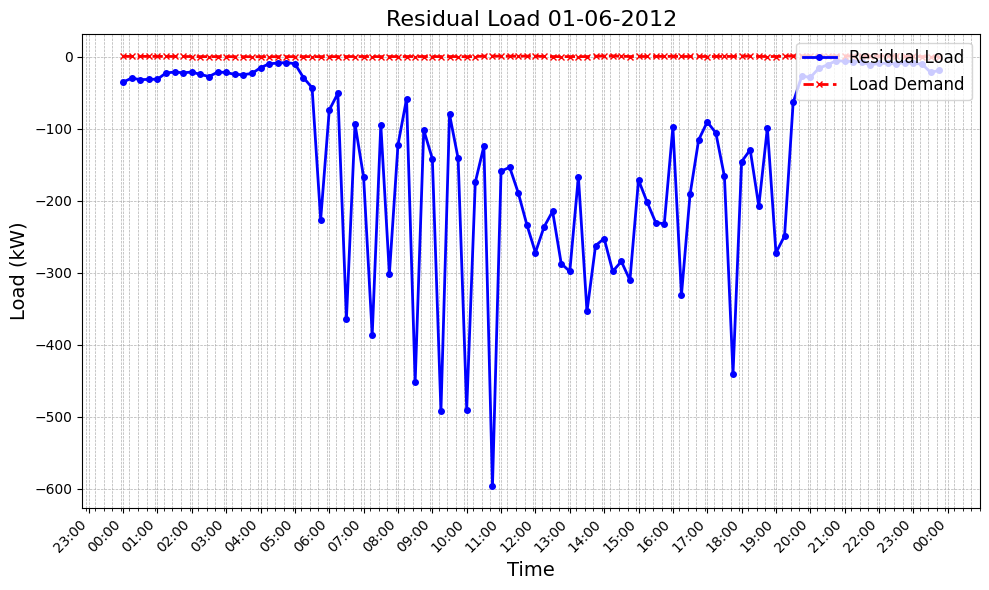

,Wind-0.wind_0-wind_gen,PV-0.pv_0-pv_gen,Load-0.load_0-load_dem,Controller-0.ctrl_0-res_load
date,,,,
2012-06-01 00:00:00,130.112997,0.000000,1.935720,-128.177277
2012-06-01 01:00:00,98.917232,0.000000,1.678851,-97.238381
2012-06-01 02:00:00,95.635192,0.000000,0.863764,-94.771429
2012-06-01 03:00:00,94.947471,0.000000,0.444122,-94.503349
2012-06-01 04:00:00,42.295756,0.000000,0.409701,-41.886055
2012-06-01 05:00:00,46.872912,261.892652,0.637982,-308.127581
2012-06-01 06:00:00,71.374770,511.916869,0.916262,-582.375378
2012-06-01 07:00:00,28.426350,922.958291,0.963003,-950.421638
2012-06-01 08:00:00,20.823259,714.950470,1.135426,-734.638302


In [6]:
day_of_year = "2012-06-01"

#Component Set Up
Components_RES_case = pd.Series(['Wind', 'PV', 'Load'])

#Input Data Simulation
number_houses = 5    #demand specs

pv_inputs = {'Module_area': 1.26, 'cap':500}
# Optional PV inputs with examples: 'NOCT': 44, 'Module_Efficiency': 0.198, 'Irradiance_at_NOCT': 800,
# 'Power_output_at_STC': 250,'peak_power':600, 'm_tilt':14,'m_az':180

wind_inputs = {'p_rated':300, 'cp':0.40}
#Options for Wind inputs with example values: 'p_rated':300, 'u_rated':10.3, 
# 'u_cutin':2.8, 'u_cutout':25, 'cp':0.40, 'diameter':22, 'output_type':'power'}

RES_case_simulation = simulation_creator_Balancing(Components_RES_case, day_of_year,number_houses,pv_inputs, wind_inputs)

RES_case_simulation.summarize_results()


The residents have decided to implement a community storage, where the electricity generated from the local renewable energy sources is stored when generation exceeds the local demand. The stored energy is used when the local generation cannot cover the demand. (+ Explanation SoC parameter in python script)

![T1_RES_case_Bat](Graphics_T1/T1_RES_case_Bat.png)

**Task 3a)**: Run the following python code that simulates a typical day in the local community with renewable generation and battery storage. For this task the State of charge is 100% in the beginning of the day. The controller acts in the following way: in the case of not enough local generation to cover the demand of the neighbourhood electricity is taken from the battery storage if possible, if this is not possible electricity is taken from the grid. How does the residual load curve change compared to task 2 (the utilization of small scale local renewable generation without storage).

**Task 3b)**: Change the State of charge parameter to 50% in the beginning of the day and run the simulation again. Explain how this affects the residual load curve.

**Task 3c)**: Change the State of charge parameter to 10% in the beginning of the day and run the simulation again. Explain how this affects the residual load curve.

Note: Changing Objective Controller: Contractual/Physical Limit for connection (Peak shaving & Load Shifting, Load Shedding)
EV/Flexibilities

The state of charge (soc) parameter

2024-08-27 09:51:03.896 | INFO     | mosaik.scenario:start:255 - Starting "Controller" as "Controller-0" ...
2024-08-27 09:51:03.909 | INFO     | mosaik.scenario:start:255 - Starting "Collector" as "Collector-0" ...
2024-08-27 09:51:03.920 | INFO     | mosaik.scenario:start:255 - Starting "CSVB" as "CSVB-0" ...


0       Wind
1         PV
2       Load
3    Battery
dtype: object
Collector create: hi
Collector create: bye


2024-08-27 09:51:04.662 | INFO     | mosaik.scenario:start:255 - Starting "Wind" as "Wind-0" ...
2024-08-27 09:51:04.688 | WARNING  | mosaik.scenario:_check_attributes_values:730 - A connection between persistent and trigger attributes is not recommended.This might cause problems in the simulation!
2024-08-27 09:51:04.688 | INFO     | mosaik.scenario:start:255 - Starting "CSVB" as "CSVB-1" ...
2024-08-27 09:51:05.501 | INFO     | mosaik.scenario:start:255 - Starting "PV" as "PV-0" ...
2024-08-27 09:51:05.528 | WARNING  | mosaik.scenario:_check_attributes_values:730 - A connection between persistent and trigger attributes is not recommended.This might cause problems in the simulation!
2024-08-27 09:51:05.529 | WARNING  | mosaik.scenario:_check_attributes_values:730 - A connection between persistent and trigger attributes is not recommended.This might cause problems in the simulation!
2024-08-27 09:51:05.529 | WARNING  | mosaik.scenario:_check_attributes_values:730 - A connection between

from wind %%%%%%%%%% 2012-06-01 00:00:00
from pv %%%%%%%%% 2012-06-01 00:00:00
from load %%%%%%%%%%% 2012-06-01 00:00:00
from controller %%%%%%%%% 2012-06-01 00:00:00
#attrs:  {'wind_gen': {'Wind-0.wind_0': 35.76452525450019}, 'pv_gen': {'PV-0.pv_0': 0.0}, 'load_dem': {'Load-0.load_0': 0.48726106250000006}}
Load dem: 0.48726106250000006
pv: 0.0
wind: 35.76452525450019
Charge Battery
Excess generation that cannot be stored: 0.0
residual load: -35.27726419200019
battery flow: 35.27726419200019
35.76452525450019 0.0 0.48726106250000006 50
from battery %%%%%%%% 2012-06-01 00:00:00
battery charged -> soc updated
from pv %%%%%%%%% 2012-06-01 00:15:00
from wind %%%%%%%%%% 2012-06-01 00:15:00
from load %%%%%%%%%%% 2012-06-01 00:15:00
from controller %%%%%%%%% 2012-06-01 00:15:00
#attrs:  {'pv_gen': {'PV-0.pv_0': 0.0}, 'wind_gen': {'Wind-0.wind_0': 30.101308509079523}, 'load_dem': {'Load-0.load_0': 0.4727848025}}
Load dem: 0.4727848025
pv: 0.0
wind: 30.101308509079523
Charge Battery
Excess gene

C:\Users\jana9\Illuminator_Git\Illuminator\Models\collector.py:102: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = existing_df.append(df)
C:\Users\jana9\Illuminator_Git\Illuminator\Models\collector.py:102: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = existing_df.append(df)
C:\Users\jana9\Illuminator_Git\Illuminator\Models\collector.py:102: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = existing_df.append(df)
C:\Users\jana9\Illuminator_Git\Illuminator\Models\collector.py:102: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = existing_df.append(df)
C:\Users\jana9\Illuminator_Git\Illuminat

from pv %%%%%%%%% 2012-06-01 01:30:00
from wind %%%%%%%%%% 2012-06-01 01:30:00
from load %%%%%%%%%%% 2012-06-01 01:30:00
from controller %%%%%%%%% 2012-06-01 01:30:00
#attrs:  {'pv_gen': {'PV-0.pv_0': 0.0}, 'wind_gen': {'Wind-0.wind_0': 21.728249901040478}, 'load_dem': {'Load-0.load_0': 0.38339174000000004}}
Load dem: 0.38339174000000004
pv: 0.0
wind: 21.728249901040478
Charge Battery
Excess generation that cannot be stored: 0.0
residual load: -21.344858161040477
battery flow: 21.344858161040477
21.728249901040478 0.0 0.38339174000000004 50
from pv %%%%%%%%% 2012-06-01 01:45:00
from wind %%%%%%%%%% 2012-06-01 01:45:00
from load %%%%%%%%%%% 2012-06-01 01:45:00
from controller %%%%%%%%% 2012-06-01 01:45:00
#attrs:  {'pv_gen': {'PV-0.pv_0': 0.0}, 'wind_gen': {'Wind-0.wind_0': 22.61555860937605}, 'load_dem': {'Load-0.load_0': 0.38236344749999995}}
Load dem: 0.38236344749999995
pv: 0.0
wind: 22.61555860937605
Charge Battery
Excess generation that cannot be stored: 0.0
residual load: -22.233

C:\Users\jana9\Illuminator_Git\Illuminator\Models\collector.py:102: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = existing_df.append(df)
C:\Users\jana9\Illuminator_Git\Illuminator\Models\collector.py:102: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = existing_df.append(df)
C:\Users\jana9\Illuminator_Git\Illuminator\Models\collector.py:102: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = existing_df.append(df)
C:\Users\jana9\Illuminator_Git\Illuminator\Models\collector.py:102: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = existing_df.append(df)
C:\Users\jana9\Illuminator_Git\Illuminat

from pv %%%%%%%%% 2012-06-01 03:00:00
from wind %%%%%%%%%% 2012-06-01 03:00:00
from load %%%%%%%%%%% 2012-06-01 03:00:00
from controller %%%%%%%%% 2012-06-01 03:00:00
#attrs:  {'pv_gen': {'PV-0.pv_0': 0.0}, 'wind_gen': {'Wind-0.wind_0': 21.96789756851643}, 'load_dem': {'Load-0.load_0': 0.18428937499999998}}
Load dem: 0.18428937499999998
pv: 0.0
wind: 21.96789756851643
Charge Battery
Excess generation that cannot be stored: 0.0
residual load: -21.783608193516432
battery flow: 21.783608193516432
21.96789756851643 0.0 0.18428937499999998 50
from pv %%%%%%%%% 2012-06-01 03:15:00
from wind %%%%%%%%%% 2012-06-01 03:15:00
from load %%%%%%%%%%% 2012-06-01 03:15:00
from controller %%%%%%%%% 2012-06-01 03:15:00
#attrs:  {'pv_gen': {'PV-0.pv_0': 0.0}, 'wind_gen': {'Wind-0.wind_0': 24.721304640046643}, 'load_dem': {'Load-0.load_0': 0.08056550750000001}}
Load dem: 0.08056550750000001
pv: 0.0
wind: 24.721304640046643
Charge Battery
Excess generation that cannot be stored: 0.0
residual load: -24.6407

C:\Users\jana9\Illuminator_Git\Illuminator\Models\collector.py:102: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = existing_df.append(df)
C:\Users\jana9\Illuminator_Git\Illuminator\Models\collector.py:102: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = existing_df.append(df)
C:\Users\jana9\Illuminator_Git\Illuminator\Models\collector.py:102: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = existing_df.append(df)
C:\Users\jana9\Illuminator_Git\Illuminator\Models\collector.py:102: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = existing_df.append(df)
 31%|███▏      | 27100/86400 [00:00<00:0

from controller %%%%%%%%% 2012-06-01 04:15:00
#attrs:  {'pv_gen': {'PV-0.pv_0': 0.0}, 'wind_gen': {'Wind-0.wind_0': 9.937133399773279}, 'load_dem': {'Load-0.load_0': 0.123025285}}
Load dem: 0.123025285
pv: 0.0
wind: 9.937133399773279
Charge Battery
Excess generation that cannot be stored: 0.0
residual load: -9.814108114773278
battery flow: 9.814108114773278
9.937133399773279 0.0 0.123025285 50
from pv %%%%%%%%% 2012-06-01 04:30:00
from wind %%%%%%%%%% 2012-06-01 04:30:00
from load %%%%%%%%%%% 2012-06-01 04:30:00
from controller %%%%%%%%% 2012-06-01 04:30:00
#attrs:  {'pv_gen': {'PV-0.pv_0': 0.0}, 'wind_gen': {'Wind-0.wind_0': 8.933567437692412}, 'load_dem': {'Load-0.load_0': 0.10827199250000001}}
Load dem: 0.10827199250000001
pv: 0.0
wind: 8.933567437692412
Charge Battery
Excess generation that cannot be stored: 0.0
residual load: -8.825295445192411
battery flow: 8.825295445192411
8.933567437692412 0.0 0.10827199250000001 50
from pv %%%%%%%%% 2012-06-01 04:45:00
from wind %%%%%%%%%% 20

C:\Users\jana9\Illuminator_Git\Illuminator\Models\collector.py:102: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = existing_df.append(df)
C:\Users\jana9\Illuminator_Git\Illuminator\Models\collector.py:102: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = existing_df.append(df)
C:\Users\jana9\Illuminator_Git\Illuminator\Models\collector.py:102: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = existing_df.append(df)
C:\Users\jana9\Illuminator_Git\Illuminator\Models\collector.py:102: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = existing_df.append(df)
C:\Users\jana9\Illuminator_Git\Illuminat

from pv %%%%%%%%% 2012-06-01 05:30:00
from wind %%%%%%%%%% 2012-06-01 05:30:00
from load %%%%%%%%%%% 2012-06-01 05:30:00
from controller %%%%%%%%% 2012-06-01 05:30:00
#attrs:  {'pv_gen': {'PV-0.pv_0': 31.125634031392703}, 'wind_gen': {'Wind-0.wind_0': 12.11023949286952}, 'load_dem': {'Load-0.load_0': 0.21883026125}}
Load dem: 0.21883026125
pv: 31.125634031392703
wind: 12.11023949286952
Charge Battery
Excess generation that cannot be stored: 3.0170432630122264
residual load: -43.017043263012226
battery flow: 40
12.11023949286952 31.125634031392703 0.21883026125 50
from pv %%%%%%%%% 2012-06-01 05:45:00
from wind %%%%%%%%%% 2012-06-01 05:45:00
from load %%%%%%%%%%% 2012-06-01 05:45:00
from controller %%%%%%%%% 2012-06-01 05:45:00
#attrs:  {'pv_gen': {'PV-0.pv_0': 213.06564549874648}, 'wind_gen': {'Wind-0.wind_0': 13.39279978905828}, 'load_dem': {'Load-0.load_0': 0.13412124250000002}}
Load dem: 0.13412124250000002
pv: 213.06564549874648
wind: 13.39279978905828
Charge Battery
Excess generat

C:\Users\jana9\Illuminator_Git\Illuminator\Models\collector.py:102: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = existing_df.append(df)
C:\Users\jana9\Illuminator_Git\Illuminator\Models\collector.py:102: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = existing_df.append(df)
C:\Users\jana9\Illuminator_Git\Illuminator\Models\collector.py:102: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = existing_df.append(df)
C:\Users\jana9\Illuminator_Git\Illuminator\Models\collector.py:102: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = existing_df.append(df)


from controller %%%%%%%%% 2012-06-01 06:30:00
#attrs:  {'pv_gen': {'PV-0.pv_0': 342.8453139927262}, 'wind_gen': {'Wind-0.wind_0': 21.41143961844171}, 'load_dem': {'Load-0.load_0': 0.23959497249999998}}
Load dem: 0.23959497249999998
pv: 342.8453139927262
wind: 21.41143961844171
Charge Battery
Excess generation that cannot be stored: 324.01715863866787
residual load: -364.01715863866787
battery flow: 40
21.41143961844171 342.8453139927262 0.23959497249999998 50
from pv %%%%%%%%% 2012-06-01 06:45:00
from wind %%%%%%%%%% 2012-06-01 06:45:00
from load %%%%%%%%%%% 2012-06-01 06:45:00
from controller %%%%%%%%% 2012-06-01 06:45:00
#attrs:  {'pv_gen': {'PV-0.pv_0': 77.89516063586485}, 'wind_gen': {'Wind-0.wind_0': 15.76908467740246}, 'load_dem': {'Load-0.load_0': 0.32497488875}}
Load dem: 0.32497488875
pv: 77.89516063586485
wind: 15.76908467740246
Charge Battery
Excess generation that cannot be stored: 53.33927042451731
residual load: -93.33927042451731
battery flow: 40
15.76908467740246 77.895

 39%|███▉      | 33900/86400 [00:01<00:02, 18170.26steps/s]C:\Users\jana9\Illuminator_Git\Illuminator\Models\collector.py:102: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = existing_df.append(df)
C:\Users\jana9\Illuminator_Git\Illuminator\Models\collector.py:102: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = existing_df.append(df)
 42%|████▏     | 36200/86400 [00:01<00:02, 18588.94steps/s]C:\Users\jana9\Illuminator_Git\Illuminator\Models\collector.py:102: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = existing_df.append(df)
C:\Users\jana9\Illuminator_Git\Illuminator\Models\collector.py:102: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a futu

from pv %%%%%%%%% 2012-06-01 07:30:00
from wind %%%%%%%%%% 2012-06-01 07:30:00
from load %%%%%%%%%%% 2012-06-01 07:30:00
from controller %%%%%%%%% 2012-06-01 07:30:00
#attrs:  {'pv_gen': {'PV-0.pv_0': 88.03271624025432}, 'wind_gen': {'Wind-0.wind_0': 6.725155590333484}, 'load_dem': {'Load-0.load_0': 0.16794858}}
Load dem: 0.16794858
pv: 88.03271624025432
wind: 6.725155590333484
Charge Battery
Excess generation that cannot be stored: 54.5899232505878
residual load: -94.5899232505878
battery flow: 40
6.725155590333484 88.03271624025432 0.16794858 50
from pv %%%%%%%%% 2012-06-01 07:45:00
from wind %%%%%%%%%% 2012-06-01 07:45:00
from load %%%%%%%%%%% 2012-06-01 07:45:00
from controller %%%%%%%%% 2012-06-01 07:45:00
#attrs:  {'pv_gen': {'PV-0.pv_0': 297.22984936328197}, 'wind_gen': {'Wind-0.wind_0': 4.884960659625227}, 'load_dem': {'Load-0.load_0': 0.22453109875}}
Load dem: 0.22453109875
pv: 297.22984936328197
wind: 4.884960659625227
Charge Battery
Excess generation that cannot be stored: 2

C:\Users\jana9\Illuminator_Git\Illuminator\Models\collector.py:102: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = existing_df.append(df)
 45%|████▍     | 38500/86400 [00:01<00:02, 17648.24steps/s]C:\Users\jana9\Illuminator_Git\Illuminator\Models\collector.py:102: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = existing_df.append(df)
C:\Users\jana9\Illuminator_Git\Illuminator\Models\collector.py:102: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = existing_df.append(df)
C:\Users\jana9\Illuminator_Git\Illuminator\Models\collector.py:102: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = exis

from pv %%%%%%%%% 2012-06-01 08:45:00
from wind %%%%%%%%%% 2012-06-01 08:45:00
from load %%%%%%%%%%% 2012-06-01 08:45:00
from controller %%%%%%%%% 2012-06-01 08:45:00
#attrs:  {'pv_gen': {'PV-0.pv_0': 96.91474617404022}, 'wind_gen': {'Wind-0.wind_0': 5.03358025576729}, 'load_dem': {'Load-0.load_0': 0.27204843875}}
Load dem: 0.27204843875
pv: 96.91474617404022
wind: 5.03358025576729
Charge Battery
Excess generation that cannot be stored: 61.6762779910575
residual load: -101.6762779910575
battery flow: 40
5.03358025576729 96.91474617404022 0.27204843875 50
from pv %%%%%%%%% 2012-06-01 09:00:00
from wind %%%%%%%%%% 2012-06-01 09:00:00
from load %%%%%%%%%%% 2012-06-01 09:00:00
from controller %%%%%%%%% 2012-06-01 09:00:00
#attrs:  {'pv_gen': {'PV-0.pv_0': 135.52077638405348}, 'wind_gen': {'Wind-0.wind_0': 6.40269109177492}, 'load_dem': {'Load-0.load_0': 0.23065882}}
Load dem: 0.23065882
pv: 135.52077638405348
wind: 6.40269109177492
Charge Battery
Excess generation that cannot be stored: 10

C:\Users\jana9\Illuminator_Git\Illuminator\Models\collector.py:102: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = existing_df.append(df)
C:\Users\jana9\Illuminator_Git\Illuminator\Models\collector.py:102: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = existing_df.append(df)
C:\Users\jana9\Illuminator_Git\Illuminator\Models\collector.py:102: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = existing_df.append(df)
 49%|████▉     | 42700/86400 [00:01<00:02, 18069.25steps/s]C:\Users\jana9\Illuminator_Git\Illuminator\Models\collector.py:102: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = exis

from pv %%%%%%%%% 2012-06-01 10:15:00
from wind %%%%%%%%%% 2012-06-01 10:15:00
from load %%%%%%%%%%% 2012-06-01 10:15:00
from controller %%%%%%%%% 2012-06-01 10:15:00
#attrs:  {'pv_gen': {'PV-0.pv_0': 162.57075852589827}, 'wind_gen': {'Wind-0.wind_0': 12.164222650555097}, 'load_dem': {'Load-0.load_0': 0.30001804}}
Load dem: 0.30001804
pv: 162.57075852589827
wind: 12.164222650555097
Charge Battery
Excess generation that cannot be stored: 134.43496313645338
residual load: -174.43496313645338
battery flow: 40
12.164222650555097 162.57075852589827 0.30001804 50
from pv %%%%%%%%% 2012-06-01 10:30:00
from wind %%%%%%%%%% 2012-06-01 10:30:00
from load %%%%%%%%%%% 2012-06-01 10:30:00
from controller %%%%%%%%% 2012-06-01 10:30:00
#attrs:  {'pv_gen': {'PV-0.pv_0': 108.14868458055827}, 'wind_gen': {'Wind-0.wind_0': 16.887212597474946}, 'load_dem': {'Load-0.load_0': 0.85715284}}
Load dem: 0.85715284
pv: 108.14868458055827
wind: 16.887212597474946
Charge Battery
Excess generation that cannot be sto

C:\Users\jana9\Illuminator_Git\Illuminator\Models\collector.py:102: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = existing_df.append(df)
C:\Users\jana9\Illuminator_Git\Illuminator\Models\collector.py:102: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = existing_df.append(df)
 54%|█████▍    | 46700/86400 [00:02<00:02, 17120.59steps/s]C:\Users\jana9\Illuminator_Git\Illuminator\Models\collector.py:102: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = existing_df.append(df)
C:\Users\jana9\Illuminator_Git\Illuminator\Models\collector.py:102: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = exis

from pv %%%%%%%%% 2012-06-01 11:15:00
from wind %%%%%%%%%% 2012-06-01 11:15:00
from load %%%%%%%%%%% 2012-06-01 11:15:00
from controller %%%%%%%%% 2012-06-01 11:15:00
#attrs:  {'pv_gen': {'PV-0.pv_0': 130.3877079411406}, 'wind_gen': {'Wind-0.wind_0': 23.863996085028973}, 'load_dem': {'Load-0.load_0': 0.7365055462500001}}
Load dem: 0.7365055462500001
pv: 130.3877079411406
wind: 23.863996085028973
Charge Battery
Excess generation that cannot be stored: 113.51519847991958
residual load: -153.51519847991958
battery flow: 40
23.863996085028973 130.3877079411406 0.7365055462500001 50
from pv %%%%%%%%% 2012-06-01 11:30:00
from wind %%%%%%%%%% 2012-06-01 11:30:00
from load %%%%%%%%%%% 2012-06-01 11:30:00
from controller %%%%%%%%% 2012-06-01 11:30:00
#attrs:  {'pv_gen': {'PV-0.pv_0': 160.61860915594409}, 'wind_gen': {'Wind-0.wind_0': 29.21987365128263}, 'load_dem': {'Load-0.load_0': 0.8110779487499999}}
Load dem: 0.8110779487499999
pv: 160.61860915594409
wind: 29.21987365128263
Charge Battery
E

C:\Users\jana9\Illuminator_Git\Illuminator\Models\collector.py:102: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = existing_df.append(df)
C:\Users\jana9\Illuminator_Git\Illuminator\Models\collector.py:102: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = existing_df.append(df)
 58%|█████▊    | 50200/86400 [00:02<00:02, 16103.99steps/s]C:\Users\jana9\Illuminator_Git\Illuminator\Models\collector.py:102: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = existing_df.append(df)
C:\Users\jana9\Illuminator_Git\Illuminator\Models\collector.py:102: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = exis

from pv %%%%%%%%% 2012-06-01 12:30:00
from wind %%%%%%%%%% 2012-06-01 12:30:00
from load %%%%%%%%%%% 2012-06-01 12:30:00
from controller %%%%%%%%% 2012-06-01 12:30:00
#attrs:  {'pv_gen': {'PV-0.pv_0': 191.32254094703302}, 'wind_gen': {'Wind-0.wind_0': 23.694948337219877}, 'load_dem': {'Load-0.load_0': 0.2291436875}}
Load dem: 0.2291436875
pv: 191.32254094703302
wind: 23.694948337219877
Charge Battery
Excess generation that cannot be stored: 174.7883455967529
residual load: -214.7883455967529
battery flow: 40
23.694948337219877 191.32254094703302 0.2291436875 50
from pv %%%%%%%%% 2012-06-01 12:45:00
from wind %%%%%%%%%% 2012-06-01 12:45:00
from load %%%%%%%%%%% 2012-06-01 12:45:00
from controller %%%%%%%%% 2012-06-01 12:45:00
#attrs:  {'pv_gen': {'PV-0.pv_0': 264.1150014385639}, 'wind_gen': {'Wind-0.wind_0': 23.359251616667443}, 'load_dem': {'Load-0.load_0': 0.21402349125}}
Load dem: 0.21402349125
pv: 264.1150014385639
wind: 23.359251616667443
Charge Battery
Excess generation that canno

C:\Users\jana9\Illuminator_Git\Illuminator\Models\collector.py:102: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = existing_df.append(df)
 62%|██████▏   | 53500/86400 [00:02<00:02, 15286.43steps/s]C:\Users\jana9\Illuminator_Git\Illuminator\Models\collector.py:102: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = existing_df.append(df)
C:\Users\jana9\Illuminator_Git\Illuminator\Models\collector.py:102: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = existing_df.append(df)
 64%|██████▍   | 55100/86400 [00:02<00:02, 15436.50steps/s]C:\Users\jana9\Illuminator_Git\Illuminator\Models\collector.py:102: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a futu

from pv %%%%%%%%% 2012-06-01 13:30:00
from wind %%%%%%%%%% 2012-06-01 13:30:00
from load %%%%%%%%%%% 2012-06-01 13:30:00
from controller %%%%%%%%% 2012-06-01 13:30:00
#attrs:  {'pv_gen': {'PV-0.pv_0': 330.3924277071239}, 'wind_gen': {'Wind-0.wind_0': 23.694948337219877}, 'load_dem': {'Load-0.load_0': 0.23344129125}}
Load dem: 0.23344129125
pv: 330.3924277071239
wind: 23.694948337219877
Charge Battery
Excess generation that cannot be stored: 313.85393475309377
residual load: -353.85393475309377
battery flow: 40
23.694948337219877 330.3924277071239 0.23344129125 50
from pv %%%%%%%%% 2012-06-01 13:45:00
from wind %%%%%%%%%% 2012-06-01 13:45:00
from load %%%%%%%%%%% 2012-06-01 13:45:00
from controller %%%%%%%%% 2012-06-01 13:45:00
#attrs:  {'pv_gen': {'PV-0.pv_0': 237.49044363102877}, 'wind_gen': {'Wind-0.wind_0': 25.510223860056925}, 'load_dem': {'Load-0.load_0': 0.683302705}}
Load dem: 0.683302705
pv: 237.49044363102877
wind: 25.510223860056925
Charge Battery
Excess generation that canno

C:\Users\jana9\Illuminator_Git\Illuminator\Models\collector.py:102: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = existing_df.append(df)
C:\Users\jana9\Illuminator_Git\Illuminator\Models\collector.py:102: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = existing_df.append(df)
C:\Users\jana9\Illuminator_Git\Illuminator\Models\collector.py:102: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = existing_df.append(df)
 68%|██████▊   | 58700/86400 [00:03<00:01, 16354.29steps/s]C:\Users\jana9\Illuminator_Git\Illuminator\Models\collector.py:102: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = exis

from pv %%%%%%%%% 2012-06-01 14:45:00
from wind %%%%%%%%%% 2012-06-01 14:45:00
from load %%%%%%%%%%% 2012-06-01 14:45:00
from controller %%%%%%%%% 2012-06-01 14:45:00
#attrs:  {'pv_gen': {'PV-0.pv_0': 280.5084605829591}, 'wind_gen': {'Wind-0.wind_0': 30.101308509079523}, 'load_dem': {'Load-0.load_0': 0.261037535}}
Load dem: 0.261037535
pv: 280.5084605829591
wind: 30.101308509079523
Charge Battery
Excess generation that cannot be stored: 270.34873155703866
residual load: -310.34873155703866
battery flow: 40
30.101308509079523 280.5084605829591 0.261037535 50
from pv %%%%%%%%% 2012-06-01 15:00:00
from wind %%%%%%%%%% 2012-06-01 15:00:00
from load %%%%%%%%%%% 2012-06-01 15:00:00
from controller %%%%%%%%% 2012-06-01 15:00:00
#attrs:  {'pv_gen': {'PV-0.pv_0': 138.03980154781465}, 'wind_gen': {'Wind-0.wind_0': 33.48470301887081}, 'load_dem': {'Load-0.load_0': 0.3681733325}}
Load dem: 0.3681733325
pv: 138.03980154781465
wind: 33.48470301887081
Charge Battery
Excess generation that cannot be s

C:\Users\jana9\Illuminator_Git\Illuminator\Models\collector.py:102: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = existing_df.append(df)
C:\Users\jana9\Illuminator_Git\Illuminator\Models\collector.py:102: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = existing_df.append(df)
 72%|███████▏  | 62000/86400 [00:03<00:01, 15369.10steps/s]C:\Users\jana9\Illuminator_Git\Illuminator\Models\collector.py:102: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = existing_df.append(df)


from controller %%%%%%%%% 2012-06-01 15:45:00
#attrs:  {'pv_gen': {'PV-0.pv_0': 204.03957458300968}, 'wind_gen': {'Wind-0.wind_0': 28.546335875818997}, 'load_dem': {'Load-0.load_0': 0.47579471249999994}}
Load dem: 0.47579471249999994
pv: 204.03957458300968
wind: 28.546335875818997
Charge Battery
Excess generation that cannot be stored: 192.1101157463287
residual load: -232.1101157463287
battery flow: 40
28.546335875818997 204.03957458300968 0.47579471249999994 50
from pv %%%%%%%%% 2012-06-01 16:00:00
from wind %%%%%%%%%% 2012-06-01 16:00:00
from load %%%%%%%%%%% 2012-06-01 16:00:00
from controller %%%%%%%%% 2012-06-01 16:00:00
#attrs:  {'pv_gen': {'PV-0.pv_0': 79.72869815713369}, 'wind_gen': {'Wind-0.wind_0': 18.411032717710054}, 'load_dem': {'Load-0.load_0': 0.57409098375}}
Load dem: 0.57409098375
pv: 79.72869815713369
wind: 18.411032717710054
Charge Battery
Excess generation that cannot be stored: 57.56563989109375
residual load: -97.56563989109375
battery flow: 40
18.411032717710054

C:\Users\jana9\Illuminator_Git\Illuminator\Models\collector.py:102: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = existing_df.append(df)
C:\Users\jana9\Illuminator_Git\Illuminator\Models\collector.py:102: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = existing_df.append(df)
 74%|███████▍  | 64300/86400 [00:03<00:01, 17094.50steps/s]C:\Users\jana9\Illuminator_Git\Illuminator\Models\collector.py:102: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = existing_df.append(df)
C:\Users\jana9\Illuminator_Git\Illuminator\Models\collector.py:102: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = exis

from pv %%%%%%%%% 2012-06-01 17:00:00
from wind %%%%%%%%%% 2012-06-01 17:00:00
from load %%%%%%%%%%% 2012-06-01 17:00:00
from controller %%%%%%%%% 2012-06-01 17:00:00
#attrs:  {'pv_gen': {'PV-0.pv_0': 78.83914208933646}, 'wind_gen': {'Wind-0.wind_0': 12.11023949286952}, 'load_dem': {'Load-0.load_0': 0.33985862875}}
Load dem: 0.33985862875
pv: 78.83914208933646
wind: 12.11023949286952
Charge Battery
Excess generation that cannot be stored: 50.60952295345598
residual load: -90.60952295345598
battery flow: 40
12.11023949286952 78.83914208933646 0.33985862875 50
from pv %%%%%%%%% 2012-06-01 17:15:00
from wind %%%%%%%%%% 2012-06-01 17:15:00
from load %%%%%%%%%%% 2012-06-01 17:15:00
from controller %%%%%%%%% 2012-06-01 17:15:00
#attrs:  {'pv_gen': {'PV-0.pv_0': 93.26606484640155}, 'wind_gen': {'Wind-0.wind_0': 12.824583023676661}, 'load_dem': {'Load-0.load_0': 0.38976617625}}
Load dem: 0.38976617625
pv: 93.26606484640155
wind: 12.824583023676661
Charge Battery
Excess generation that cannot b

C:\Users\jana9\Illuminator_Git\Illuminator\Models\collector.py:102: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = existing_df.append(df)
C:\Users\jana9\Illuminator_Git\Illuminator\Models\collector.py:102: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = existing_df.append(df)
 79%|███████▊  | 67900/86400 [00:03<00:01, 16111.43steps/s]C:\Users\jana9\Illuminator_Git\Illuminator\Models\collector.py:102: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = existing_df.append(df)
C:\Users\jana9\Illuminator_Git\Illuminator\Models\collector.py:102: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = exis

from pv %%%%%%%%% 2012-06-01 18:15:00
from wind %%%%%%%%%% 2012-06-01 18:15:00
from load %%%%%%%%%%% 2012-06-01 18:15:00
from controller %%%%%%%%% 2012-06-01 18:15:00
#attrs:  {'pv_gen': {'PV-0.pv_0': 103.78723106602001}, 'wind_gen': {'Wind-0.wind_0': 26.22542271191007}, 'load_dem': {'Load-0.load_0': 0.79082864}}
Load dem: 0.79082864
pv: 103.78723106602001
wind: 26.22542271191007
Charge Battery
Excess generation that cannot be stored: 89.22182513793007
residual load: -129.22182513793007
battery flow: 40
26.22542271191007 103.78723106602001 0.79082864 50
from pv %%%%%%%%% 2012-06-01 18:30:00
from wind %%%%%%%%%% 2012-06-01 18:30:00
from load %%%%%%%%%%% 2012-06-01 18:30:00
from controller %%%%%%%%% 2012-06-01 18:30:00
#attrs:  {'pv_gen': {'PV-0.pv_0': 191.91128805434786}, 'wind_gen': {'Wind-0.wind_0': 16.157894125570678}, 'load_dem': {'Load-0.load_0': 0.41811658874999996}}
Load dem: 0.41811658874999996
pv: 191.91128805434786
wind: 16.157894125570678
Charge Battery
Excess generation that

C:\Users\jana9\Illuminator_Git\Illuminator\Models\collector.py:102: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = existing_df.append(df)
 83%|████████▎ | 71500/86400 [00:03<00:00, 15929.45steps/s]C:\Users\jana9\Illuminator_Git\Illuminator\Models\collector.py:102: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = existing_df.append(df)
C:\Users\jana9\Illuminator_Git\Illuminator\Models\collector.py:102: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = existing_df.append(df)
 85%|████████▍ | 73100/86400 [00:03<00:00, 15532.84steps/s]C:\Users\jana9\Illuminator_Git\Illuminator\Models\collector.py:102: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a futu

from pv %%%%%%%%% 2012-06-01 19:15:00
from wind %%%%%%%%%% 2012-06-01 19:15:00
from load %%%%%%%%%%% 2012-06-01 19:15:00
from controller %%%%%%%%% 2012-06-01 19:15:00
#attrs:  {'pv_gen': {'PV-0.pv_0': 200.38074184486922}, 'wind_gen': {'Wind-0.wind_0': 49.135845667717525}, 'load_dem': {'Load-0.load_0': 0.66127369}}
Load dem: 0.66127369
pv: 200.38074184486922
wind: 49.135845667717525
Charge Battery
Excess generation that cannot be stored: 208.85531382258674
residual load: -248.85531382258674
battery flow: 40
49.135845667717525 200.38074184486922 0.66127369 50
from pv %%%%%%%%% 2012-06-01 19:30:00
from wind %%%%%%%%%% 2012-06-01 19:30:00
from load %%%%%%%%%%% 2012-06-01 19:30:00
from controller %%%%%%%%% 2012-06-01 19:30:00
#attrs:  {'pv_gen': {'PV-0.pv_0': 46.14344131106664}, 'wind_gen': {'Wind-0.wind_0': 18.625666961216446}, 'load_dem': {'Load-0.load_0': 1.21121204125}}
Load dem: 1.21121204125
pv: 46.14344131106664
wind: 18.625666961216446
Charge Battery
Excess generation that cannot be

C:\Users\jana9\Illuminator_Git\Illuminator\Models\collector.py:102: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = existing_df.append(df)
C:\Users\jana9\Illuminator_Git\Illuminator\Models\collector.py:102: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = existing_df.append(df)
 89%|████████▉ | 76700/86400 [00:04<00:00, 16179.09steps/s]C:\Users\jana9\Illuminator_Git\Illuminator\Models\collector.py:102: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = existing_df.append(df)
C:\Users\jana9\Illuminator_Git\Illuminator\Models\collector.py:102: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = exis

from pv %%%%%%%%% 2012-06-01 20:30:00
from wind %%%%%%%%%% 2012-06-01 20:30:00
from load %%%%%%%%%%% 2012-06-01 20:30:00
from controller %%%%%%%%% 2012-06-01 20:30:00
#attrs:  {'pv_gen': {'PV-0.pv_0': 4.206898594013526}, 'wind_gen': {'Wind-0.wind_0': 8.206125648932222}, 'load_dem': {'Load-0.load_0': 1.1644914325}}
Load dem: 1.1644914325
pv: 4.206898594013526
wind: 8.206125648932222
Charge Battery
Excess generation that cannot be stored: 0.0
residual load: -11.248532810445749
battery flow: 11.248532810445749
8.206125648932222 4.206898594013526 1.1644914325 50
from pv %%%%%%%%% 2012-06-01 20:45:00
from wind %%%%%%%%%% 2012-06-01 20:45:00
from load %%%%%%%%%%% 2012-06-01 20:45:00
from controller %%%%%%%%% 2012-06-01 20:45:00
#attrs:  {'pv_gen': {'PV-0.pv_0': 0.701550955748133}, 'wind_gen': {'Wind-0.wind_0': 5.888445381038877}, 'load_dem': {'Load-0.load_0': 1.0872060875}}
Load dem: 1.0872060875
pv: 0.701550955748133
wind: 5.888445381038877
Charge Battery
Excess generation that cannot be st

C:\Users\jana9\Illuminator_Git\Illuminator\Models\collector.py:102: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = existing_df.append(df)
C:\Users\jana9\Illuminator_Git\Illuminator\Models\collector.py:102: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = existing_df.append(df)
 93%|█████████▎| 80500/86400 [00:04<00:00, 17289.39steps/s]C:\Users\jana9\Illuminator_Git\Illuminator\Models\collector.py:102: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = existing_df.append(df)
C:\Users\jana9\Illuminator_Git\Illuminator\Models\collector.py:102: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = exis

from pv %%%%%%%%% 2012-06-01 22:00:00
from wind %%%%%%%%%% 2012-06-01 22:00:00
from load %%%%%%%%%%% 2012-06-01 22:00:00
from controller %%%%%%%%% 2012-06-01 22:00:00
#attrs:  {'pv_gen': {'PV-0.pv_0': 0.0}, 'wind_gen': {'Wind-0.wind_0': 9.889963541666129}, 'load_dem': {'Load-0.load_0': 1.0085116825}}
Load dem: 1.0085116825
pv: 0.0
wind: 9.889963541666129
Charge Battery
Excess generation that cannot be stored: 0.0
residual load: -8.881451859166129
battery flow: 8.881451859166129
9.889963541666129 0.0 1.0085116825 50
from pv %%%%%%%%% 2012-06-01 22:15:00
from wind %%%%%%%%%% 2012-06-01 22:15:00
from load %%%%%%%%%%% 2012-06-01 22:15:00
from controller %%%%%%%%% 2012-06-01 22:15:00
#attrs:  {'pv_gen': {'PV-0.pv_0': 0.0}, 'wind_gen': {'Wind-0.wind_0': 10.41710713780405}, 'load_dem': {'Load-0.load_0': 1.03801176375}}
Load dem: 1.03801176375
pv: 0.0
wind: 10.41710713780405
Charge Battery
Excess generation that cannot be stored: 0.0
residual load: -9.379095374054051
battery flow: 9.3790953740

C:\Users\jana9\Illuminator_Git\Illuminator\Models\collector.py:102: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = existing_df.append(df)
 98%|█████████▊| 84300/86400 [00:04<00:00, 16824.74steps/s]C:\Users\jana9\Illuminator_Git\Illuminator\Models\collector.py:102: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = existing_df.append(df)
C:\Users\jana9\Illuminator_Git\Illuminator\Models\collector.py:102: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = existing_df.append(df)
100%|█████████▉| 86100/86400 [00:04<00:00, 16194.62steps/s]C:\Users\jana9\Illuminator_Git\Illuminator\Models\collector.py:102: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a futu

from pv %%%%%%%%% 2012-06-01 23:00:00
from wind %%%%%%%%%% 2012-06-01 23:00:00
from load %%%%%%%%%%% 2012-06-01 23:00:00
from controller %%%%%%%%% 2012-06-01 23:00:00
#attrs:  {'pv_gen': {'PV-0.pv_0': 0.0}, 'wind_gen': {'Wind-0.wind_0': 9.796072112560973}, 'load_dem': {'Load-0.load_0': 0.43267512374999995}}
Load dem: 0.43267512374999995
pv: 0.0
wind: 9.796072112560973
Charge Battery
Excess generation that cannot be stored: 0.0
residual load: -9.363396988810972
battery flow: 9.363396988810972
9.796072112560973 0.0 0.43267512374999995 50
from pv %%%%%%%%% 2012-06-01 23:15:00
from wind %%%%%%%%%% 2012-06-01 23:15:00
from load %%%%%%%%%%% 2012-06-01 23:15:00
from controller %%%%%%%%% 2012-06-01 23:15:00
#attrs:  {'pv_gen': {'PV-0.pv_0': 0.0}, 'wind_gen': {'Wind-0.wind_0': 10.27152856889632}, 'load_dem': {'Load-0.load_0': 0.21579170625000002}}
Load dem: 0.21579170625000002
pv: 0.0
wind: 10.27152856889632
Charge Battery
Excess generation that cannot be stored: 0.0
residual load: -10.05573686


2024-08-27 09:51:11.324 | INFO     | mosaik.scenario:run:576 - Simulation finished successfully.


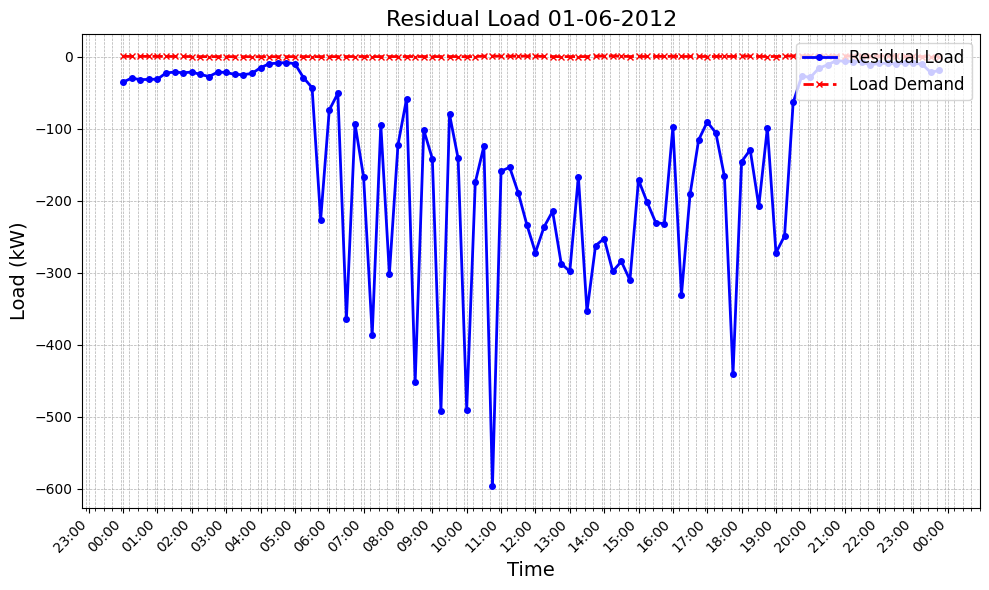

,Battery-0.Battery_0-p_out,Battery-0.Battery_0-soc,Wind-0.wind_0-wind_gen,PV-0.pv_0-pv_gen,Load-0.load_0-load_dem,Controller-0.ctrl_0-flow2b,Controller-0.ctrl_0-res_load
date,,,,,,,
2012-06-01 00:00:00,141.109057,3.968000,130.112997,0.000000,1.935720,128.177277,-128.177277
2012-06-01 01:00:00,141.109057,3.968000,98.917232,0.000000,1.678851,97.238381,-97.238381
2012-06-01 02:00:00,141.109057,3.968000,95.635192,0.000000,0.863764,94.771429,-94.771429
2012-06-01 03:00:00,141.109057,3.968000,94.947471,0.000000,0.444122,94.503349,-94.503349
2012-06-01 04:00:00,141.109057,3.968000,42.295756,0.000000,0.409701,41.886055,-41.886055
2012-06-01 05:00:00,141.109057,3.968000,46.872912,261.892652,0.637982,118.786214,-308.127581
2012-06-01 06:00:00,141.109057,3.968000,71.374770,511.916869,0.916262,160.000000,-582.375378
2012-06-01 07:00:00,141.109057,3.968000,28.426350,922.958291,0.963003,160.000000,-950.421638
2012-06-01 08:00:00,141.109057,3.968000,20.823259,714.950470,1.135426,160.000000,-734.638302


In [3]:
day_of_year = "2012-06-01"

Components_RES_Bat_case = pd.Series(['Wind', 'PV', 'Load', 'Battery'])

print(Components_RES_Bat_case)
#Input Data Simulation
number_houses = 5    #demand specs

pv_inputs = {'Module_area': 1.26, 'cap':500}
# Optional PV inputs with examples: 'NOCT': 44, 'Module_Efficiency': 0.198, 'Irradiance_at_NOCT': 800,
# 'Power_output_at_STC': 250,'peak_power':600, 'm_tilt':14,'m_az':180

wind_inputs = {'p_rated':300, 'cp':0.40}
#Options for Wind inputs with example values: 'p_rated':300, 'u_rated':10.3, 
# 'u_cutin':2.8, 'u_cutout':25, 'cp':0.40, 'diameter':22, 'output_type':'power'}


battery_inputs = {'initial_soc': 0, 'charge_efficiency': 0.9, 'discharge_efficiency': 0.9, 'soc_min': 10}
#Options for Battery inputs with example values :{'initial_soc': 20, 'max_p': 800, 'min_p': -800, 'max_energy': 800, 'charge_efficiency': 0.9, 
# 'discharge_efficiency': 0.9, 'soc_min': 10, 'soc_max': 90}

Battery_case_simulation = simulation_creator_Balancing(Components_RES_Bat_case,day_of_year,number_houses,pv_inputs, wind_inputs,battery_inputs)

Battery_case_simulation.summarize_results()
